<a href="https://colab.research.google.com/github/inbalv/tictactoe/blob/master/fairmatic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numdifftools

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('task_dataset.csv')
print("n_sessions:", df.shape)

print(df.dtypes)



n_sessions: (9584, 13)
driver_id               object
month                   object
count_trip             float64
miles                  float64
drive_hours            float64
count_brakes           float64
count_accelarations    float64
time_speeding_hours    float64
time_phoneuse_hours    float64
highway_miles          float64
night_drive_hrs        float64
maximum_speed          float64
collisions               int64
dtype: object


In [ ]:

total_rows_before = df.shape[0]
duplicate_rows = df.duplicated().sum()
print("Total rows before duplicate removal:", total_rows_before)
print("Number of duplicate rows:", duplicate_rows)
df_cleaned = df.drop_duplicates()
total_rows_after = df_cleaned.shape[0]
print("Total rows after duplicate removal:", total_rows_after)



total_count = len(df)
distinct_counts = df.nunique(dropna=True)
missing_counts = df.isnull().sum()
summary = pd.DataFrame({
    'Distinct Count': distinct_counts,
    'Missing Count': missing_counts,
    'Missing%': (missing_counts / total_count)*100
})

display(summary)

# Drop records with missing core features:
df = df[df['count_trip'].notna()].copy()
df = df[df['miles'].notna()].copy()
df = df[df['drive_hours'].notna()].copy()


df['time_phoneuse_hours'] = df['time_phoneuse_hours'].fillna(df['time_phoneuse_hours'].median()).copy()


total_count = len(df)
distinct_counts = df.nunique(dropna=True)
missing_counts = df.isnull().sum()
summary = pd.DataFrame({
    'Distinct Count': distinct_counts,
    'Missing Count': missing_counts,
    'Missing%': (missing_counts / total_count)*100
})

display(summary)

non_unique_drivers = df.groupby('driver_id').filter(lambda x: len(x) > 1)
print("\n")
print("Non-Unique Drivers: \n")
display(non_unique_drivers.sort_values(by='driver_id'))
print("Driver YEP-237 has 2 differnt recods in Jul-22 - I would recommend to discuss with the company account manager to understand if an error was done")
print("I will recommend to remove driver YEP-237 from the dataset until data verification")

print("\n")
collisions = df[df['collisions'] > 0]
print(f"At least one collision: {len(collisions)}")
print(f"Ratio of at least one collision from df :{(len(collisions)/len(df))} ")
two_collisions = df[df['collisions'] > 1]
print(f"Two or more collisions: {len(two_collisions)}\n")
#display(two_collisions)

Total rows before duplicate removal: 9584
Number of duplicate rows: 0
Total rows after duplicate removal: 9584


,Distinct Count,Missing Count,Missing%
driver_id,9579,0,0.000000
month,12,0,0.000000
count_trip,31,67,0.699082
miles,9452,67,0.699082
drive_hours,4218,67,0.699082
count_brakes,1069,67,0.699082
count_accelarations,1071,67,0.699082
time_speeding_hours,2828,67,0.699082
time_phoneuse_hours,8280,1304,13.606010
highway_miles,7830,67,0.699082


,Distinct Count,Missing Count,Missing%
driver_id,9512,0,0.0
month,12,0,0.0
count_trip,31,0,0.0
miles,9452,0,0.0
drive_hours,4218,0,0.0
count_brakes,1069,0,0.0
count_accelarations,1071,0,0.0
time_speeding_hours,2828,0,0.0
time_phoneuse_hours,8281,0,0.0
highway_miles,7830,0,0.0




Non-Unique Drivers: 



,driver_id,month,count_trip,miles,drive_hours,count_brakes,count_accelarations,time_speeding_hours,time_phoneuse_hours,highway_miles,night_drive_hrs,maximum_speed,collisions
1915,FXL-223,Dec-22,6.0,69.48084,5.59,47.000000,47.000000,0.000000,1.864871,2.6640,0.0,86.0,0
3739,FXL-223,May-22,10.0,450.95772,29.31,13.000000,13.000000,0.000000,0.818991,252.1525,0.0,69.0,0
5295,FZQ-261,Jul-22,6.0,285.45612,12.95,17.000000,17.000000,0.017500,0.190306,9.4118,0.0,73.0,0
8058,FZQ-261,Jun-22,8.0,335.87700,17.93,45.000000,45.000000,0.000000,1.128531,35.9513,0.0,76.0,0
336,VNJ-703,May-22,5.0,91.35612,4.00,26.792005,26.792005,0.000000,1.617170,10.2835,0.0,89.0,0
3388,VNJ-703,Oct-22,17.0,1238.34708,51.46,343.000000,343.000000,0.025555,0.209155,158.3548,0.0,82.0,0
1006,YDP-996,Jan-22,8.0,257.20932,28.96,29.000000,29.000000,0.006667,1.128531,92.0264,0.0,79.0,0
2923,YDP-996,Feb-22,1.0,14.83404,0.89,6.000000,6.000000,0.000000,0.195932,2.9239,0.0,76.0,0
3588,YEP-237,Jul-22,12.0,452.61528,19.06,28.000000,32.000000,0.000000,0.538254,173.4062,0.0,81.0,0
9548,YEP-237,Jul-22,9.0,321.35748,19.19,128.000000,128.000000,0.000000,1.280259,4.8516,0.0,89.0,1


Driver YEP-237 has 2 differnt recods in Jul-22 - I would recommend to discuss with the company account manager to understand if an error was done
I will recommend to remove driver YEP-237 from the dataset until data verification


At least one collision: 452
Ratio of at least one collision from df :0.04749395818009877 
Two or more collisions: 16



In [ ]:
#todo create a weight vector where 2 colissions get higher wieght
df['label'] = df['collisions'].apply(lambda x: 1.0 if x > 0 else 0.0)
df['weights'] = df['collision_weight'] = df['collisions'].apply(lambda x: 5 if x > 1 else (2 if 0 < x < 2 else 1))
df['weights'] = df['weights'].astype(float)

In [ ]:
numeric_cols = ['count_trip', 'miles', 'drive_hours',
       'count_brakes', 'count_accelarations', 'time_speeding_hours',
       'time_phoneuse_hours', 'highway_miles', 'night_drive_hrs',
       'maximum_speed']
print ("********* describe statistics: ***************")
summary_stats = df[numeric_cols].describe()
display(summary_stats.T)
miles_anomaly = df[df['miles'] > 7000]

print(f"\n found {len(miles_anomaly)} annomaly sessions (miles > 7000) which will be removed from df: \n ")
display(miles_anomaly)
df = df[df['miles'] < 7000].copy()

print ("********* describe statistics: ***************")
summary_stats = df[numeric_cols].describe()
display(summary_stats.T)

********* describe statistics: ***************


,count,mean,std,min,25%,50%,75%,max
count_trip,9517.0,8.506672,7.701127,1.000000,2.000000,6.000000,14.000000,31.000000
miles,9517.0,502.517065,3250.500295,0.000000,38.076120,168.443880,587.794440,309382.684000
drive_hours,9517.0,24.368069,144.798040,0.000000,1.910000,8.380000,29.460000,13720.630000
count_brakes,9517.0,116.444195,951.467644,0.000000,8.000000,26.000000,106.000000,90489.000000
count_accelarations,9517.0,117.455858,951.460590,0.000000,9.000000,27.000000,107.000000,90489.000000
time_speeding_hours,9517.0,0.091836,0.715532,0.000000,0.000000,0.000000,0.028333,51.154763
time_phoneuse_hours,9517.0,1.117002,0.591989,0.000418,0.644101,1.128531,1.594027,2.199764
highway_miles,9517.0,104.524399,1011.653674,0.000000,2.077100,17.226900,80.564600,96161.674500
night_drive_hrs,9517.0,0.110754,1.854022,0.000000,0.000000,0.000000,0.000000,106.450000
maximum_speed,9517.0,78.332458,7.542900,60.000000,74.000000,78.000000,84.000000,90.000000



 found 4 annomaly sessions (miles > 7000) which will be removed from df: 
 


,driver_id,month,count_trip,miles,drive_hours,count_brakes,count_accelarations,time_speeding_hours,time_phoneuse_hours,highway_miles,night_drive_hrs,maximum_speed,collisions,label,weights,collision_weight
429,CHH-089,Sep-22,23.0,7976.06592,180.57,795.0,795.0,7.982006,1.763461,3974.2953,0.00,73.0,0,0.0,1.0,1
1017,PRC-871,Oct-22,28.0,14902.60476,615.17,3789.0,3789.0,0.341101,0.142052,3713.7080,0.00,71.0,2,1.0,5.0,5
1888,DMR-716,Oct-22,28.0,7365.66000,566.45,1168.0,1168.0,5.283587,0.428408,2316.0513,106.45,76.0,0,0.0,1.0,1
7475,HHL-046,Apr-22,27.0,309382.68400,13720.63,90489.0,90489.0,51.154763,1.314183,96161.6745,14.29,78.0,1,1.0,2.0,2


********* describe statistics: ***************


,count,mean,std,min,25%,50%,75%,max
count_trip,9513.0,8.499106,7.693784,1.000000,2.000000,6.000000,14.000000,31.000000
miles,9513.0,467.027005,711.437768,0.000000,38.074560,168.376560,586.233840,6648.581040
drive_hours,9513.0,22.792819,34.372995,0.000000,1.910000,8.380000,29.380000,444.680000
count_brakes,9513.0,106.376369,212.994865,0.000000,8.000000,26.000000,106.000000,5079.969246
count_accelarations,9513.0,107.388458,213.011185,0.000000,9.000000,27.000000,107.000000,5083.969246
time_speeding_hours,9513.0,0.085067,0.478175,0.000000,0.000000,0.000000,0.028333,21.754316
time_phoneuse_hours,9513.0,1.117089,0.591947,0.000418,0.644481,1.128531,1.594027,2.199764
highway_miles,9513.0,93.408281,224.179962,0.000000,2.077100,17.188200,80.165700,3871.942100
night_drive_hrs,9513.0,0.098109,1.492892,0.000000,0.000000,0.000000,0.000000,80.720000
maximum_speed,9513.0,78.334069,7.543875,60.000000,74.000000,78.000000,84.000000,90.000000


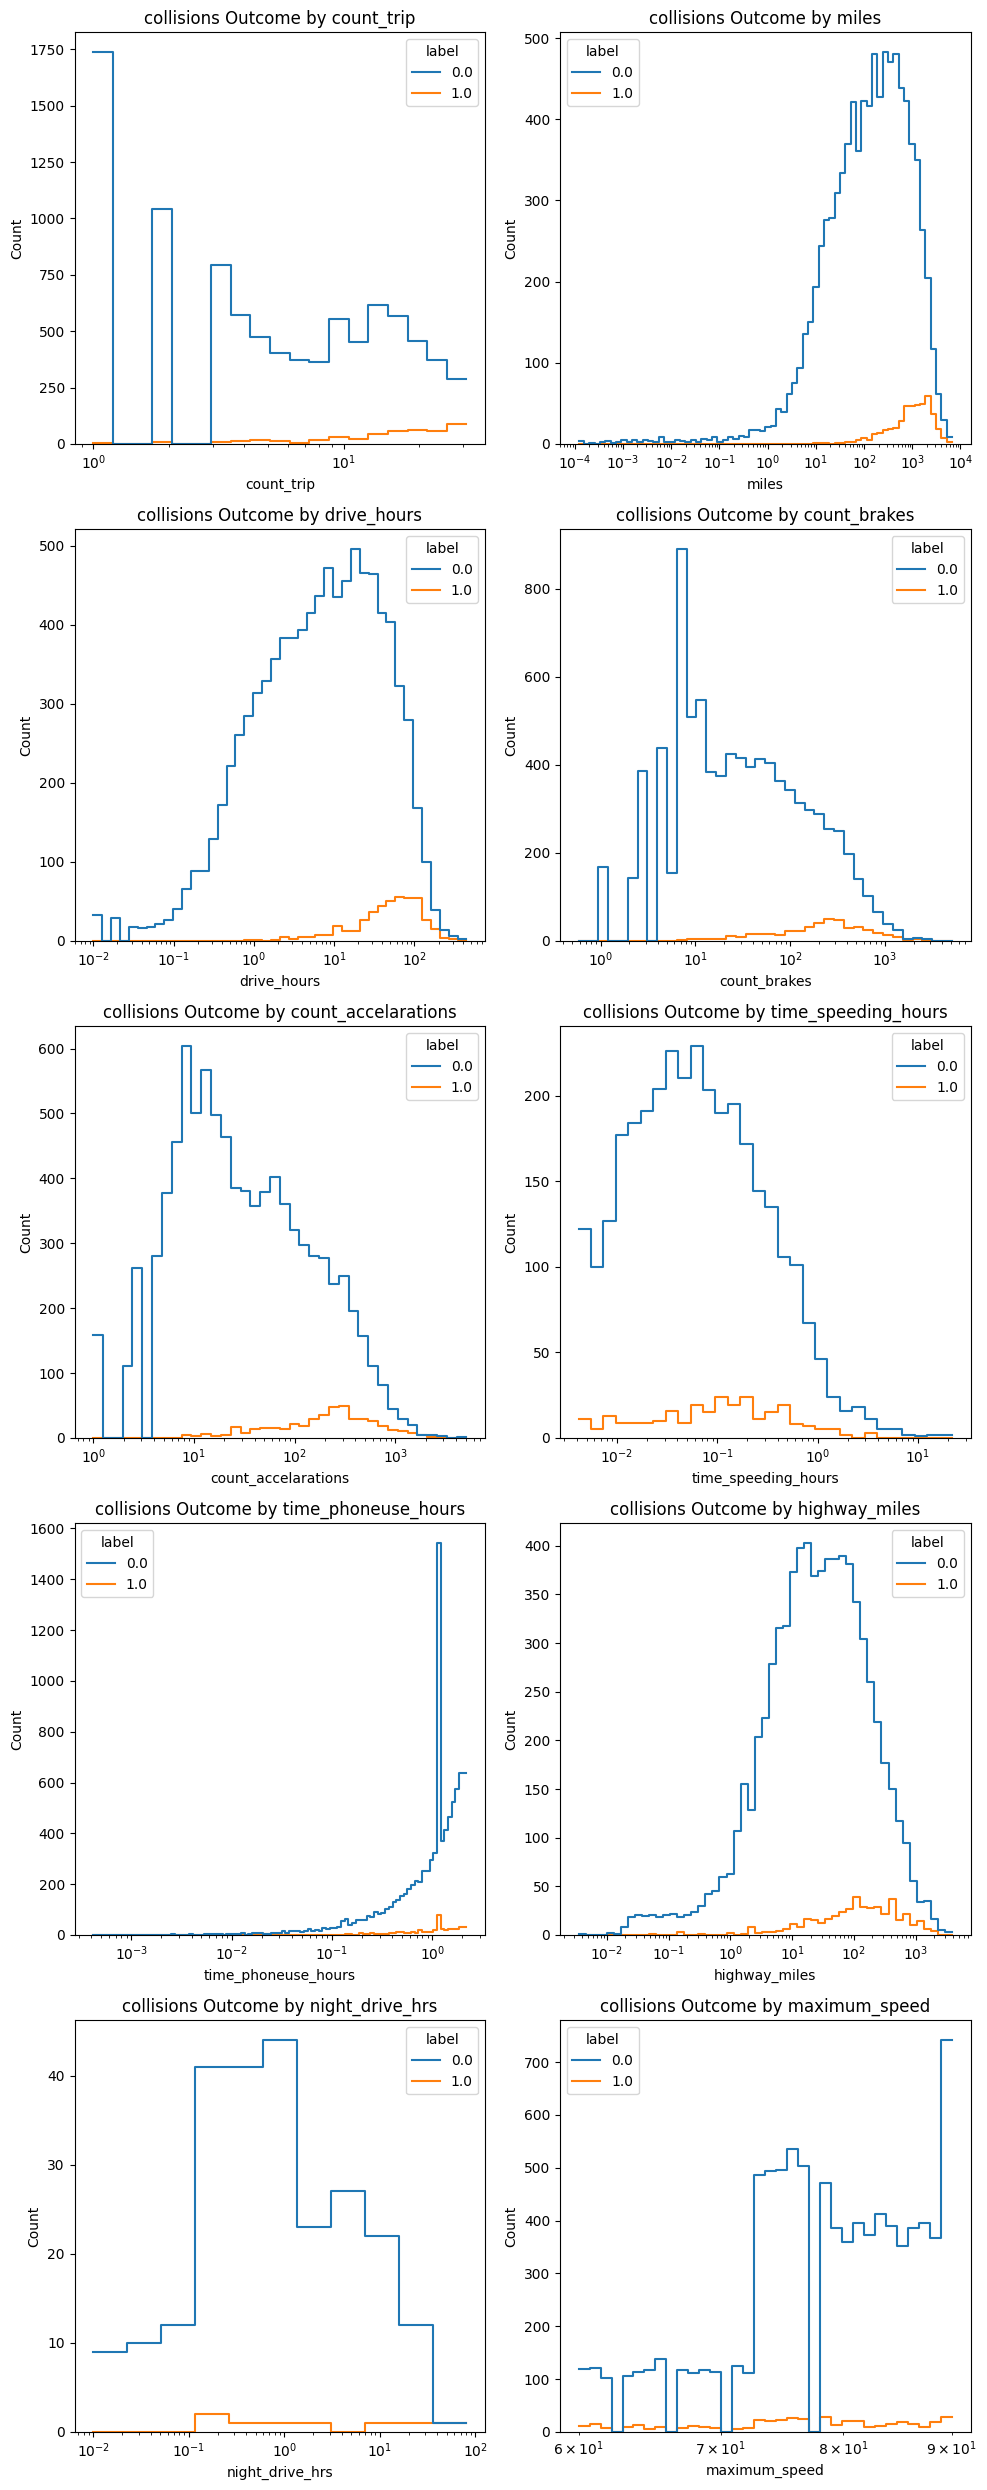

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,25))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.histplot(x=col, hue='label', data=df, ax=ax,log_scale=True, element="step", fill=False )#,   multiple="stack")
    ax.set_title(f"collisions Outcome by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

if len(numeric_cols) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:

def feature_engineering(df):

    df['mean_speed'] = df['miles'] / df['drive_hours']
    df['speeding_ratio'] = df['time_speeding_hours'] / df['drive_hours']

    df['highway_ratio'] = df['highway_miles'] / df['miles']
    df['night_drive_ratio'] = df['night_drive_hrs'] / df['drive_hours']

    df['est_brakes_per_mile'] = df['count_brakes'] / df['miles']
    df['est_accel_per_mile'] = df['count_accelarations'] / df['miles']
    #df['est_brakes_per_hour'] = df['count_brakes'] / df['drive_hours']
    #df['est_accel_per_hour'] = df['count_accelarations'] / df['drive_hours']
    features = ['mean_speed', 'speeding_ratio', 'highway_ratio', 'night_drive_ratio', 'est_brakes_per_mile', 'est_accel_per_mile']

    # some more features
    df['miles_per_trip_count'] = df['miles'] / df['count_trip']
    df['speeding_night_interaction'] = df['time_speeding_hours'] * df['night_drive_ratio']
    df['speeding_highway_interaction'] = df['time_speeding_hours'] * df['highway_ratio']
    df['braking_trip_interaction'] = df['est_brakes_per_mile'] * df['count_trip']
    df['accel_trip_interaction'] = df['est_accel_per_mile'] * df['count_trip']
    df['phone_highway_interaction'] = df['time_phoneuse_hours'] * df['highway_ratio']
    df['phone_night_interaction'] = df['time_phoneuse_hours'] * df['night_drive_ratio']
    df['phone_no_highgway_interaction'] = df['time_phoneuse_hours'] * (1 - df['highway_ratio'])


    features = features + ['miles_per_trip_count','speeding_night_interaction',
                           'speeding_highway_interaction', 'braking_trip_interaction',
                           'accel_trip_interaction', 'phone_highway_interaction',
                           'phone_night_interaction', 'phone_no_highgway_interaction']

    #df['brakes_per_hour'] = df['count_brakes'] / df['drive_hours']
    # df['accelerations_per_hour'] = df['count_accelarations'] / df['drive_hours']
    # df['speeding_ratio'] = df['time_speeding_hours'] / df['drive_hours']  # Already exists
    # df['phone_use_ratio'] = df['time_phoneuse_hours'] / df['drive_hours']
    # df['highway_miles_per_hour'] = df['highway_miles'] / df['drive_hours']

    # features = features + ['brakes_per_hour', 'accelerations_per_hour','speeding_ratio',
    #                       'phone_use_ratio', 'highway_miles_per_hour']


    df['month_date'] = pd.to_datetime(df['month'], format='%b-%y', errors='coerce')

    return df, features

import pandas as pd

def assign_season(date):
    """
    Convert a datetime object into a season label based on US meteorological seasons:
    - Winter: December, January, February
    - Spring: March, April, May
    - Summer: June, July, August
    - Fall: September, October, November
    """
    month = date.month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

df['month_date'] = pd.to_datetime(df['month'], format='%b-%y', errors='coerce')
df['season'] = df['month_date'].apply(assign_season)
df['month_string'] = df['month_date'].dt.strftime('%B')
# I assume the FIRST 3 letters are comany id - I might be wrong
#df['driver_company'] = df['driver_id'].str.split('-').str[0]
#display(df['driver_company'].value_counts().sort_values(ascending=False))
# The driver_company feature is very sparse and will not be part of the cat features


categorical_cols = ['season','month_string']#, 'month_string', 'driver_company']


df, eng_numerical_cols = feature_engineering(df)
numerical_cols = list(set(eng_numerical_cols +['maximum_speed','miles', "count_brakes","count_accelarations","time_speeding_hours",'time_phoneuse_hours',"highway_miles"]))
#df = df.sort_values(by='month_date', ascending=True).copy()

print(f"{df.label.sum()} , {len(df.label)}")

#cleaning irrelevant sessions
# Drop records with 0 in  core features (divide by 0):
df = df[df['miles'] > 10].copy()
df = df[df['drive_hours']> 0.5 ].copy()
df = df[df['count_trip'] > 0].copy()
df = df[df['highway_ratio'] <= 1].copy()
df = df[df['night_drive_ratio'] <= 1].copy()

print(f"{df.label.sum()} , {len(df.label)}")


450.0 , 9513
450.0 , 8460


In [ ]:
df.groupby('label')[numerical_cols].mean().T

label,0.0,1.0
time_speeding_hours,0.092368,0.151152
braking_trip_interaction,2.092957,4.443890
accel_trip_interaction,2.137327,4.462096
phone_no_highgway_interaction,0.929018,0.934801
night_drive_ratio,0.004672,0.001075
speeding_night_interaction,0.000608,0.000173
phone_highway_interaction,0.187539,0.183206
mean_speed,21.388679,20.598085
speeding_highway_interaction,0.031083,0.036602
est_accel_per_mile,0.267142,0.285349


In [ ]:

target_col = 'label'
df_ohe = pd.get_dummies(df[categorical_cols], prefix=categorical_cols)

# Combine one-hot encoded columns with numerical columns
X = pd.concat([df_ohe, df[numerical_cols]], axis=1)
y = df[target_col].values
sample_weights = df['weights'].values

ordered_feature_names = X.columns.tolist()
print("Ordered feature names :", ordered_feature_names)





Ordered feature names : ['season_Fall', 'season_Spring', 'season_Summer', 'season_Winter', 'month_string_April', 'month_string_August', 'month_string_December', 'month_string_February', 'month_string_January', 'month_string_July', 'month_string_June', 'month_string_March', 'month_string_May', 'month_string_November', 'month_string_October', 'month_string_September', 'time_speeding_hours', 'braking_trip_interaction', 'accel_trip_interaction', 'phone_no_highgway_interaction', 'night_drive_ratio', 'speeding_night_interaction', 'phone_highway_interaction', 'mean_speed', 'speeding_highway_interaction', 'est_accel_per_mile', 'maximum_speed', 'est_brakes_per_mile', 'speeding_ratio', 'miles_per_trip_count', 'highway_ratio', 'miles', 'highway_miles', 'count_brakes', 'count_accelarations', 'phone_night_interaction', 'time_phoneuse_hours']


In [ ]:
print ("********* describe statistics: ***************")
summary_stats = X.describe()
display(summary_stats.T)

********* describe statistics: ***************


,count,mean,std,min,25%,50%,75%,max
time_speeding_hours,8460.0,0.095495,0.506065,0.000000,0.000000,0.000000,0.037787,21.754316
braking_trip_interaction,8460.0,2.218006,2.836535,0.000000,0.475321,1.145068,2.849165,37.629052
accel_trip_interaction,8460.0,2.260985,2.833837,0.000000,0.521352,1.197437,2.896083,37.658682
phone_no_highgway_interaction,8460.0,0.929326,0.530316,0.000277,0.507315,0.924198,1.294049,2.196860
night_drive_ratio,8460.0,0.004481,0.046185,0.000000,0.000000,0.000000,0.000000,1.000000
speeding_night_interaction,8460.0,0.000585,0.014940,0.000000,0.000000,0.000000,0.000000,1.120325
phone_highway_interaction,8460.0,0.187308,0.214724,0.000000,0.025570,0.113662,0.276862,1.542107
mean_speed,8460.0,21.346626,7.264069,0.100461,16.843932,20.551781,24.806556,88.208133
speeding_highway_interaction,8460.0,0.031377,0.241164,0.000000,0.000000,0.000000,0.005545,11.474867
est_accel_per_mile,8460.0,0.268110,0.217750,0.000000,0.109825,0.213524,0.364057,1.718549


KeyError: 'label'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score, precision_recall_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from xgboost import callback
from numdifftools import Derivative as derivative # import the derivative function
from tabulate import tabulate


def weighted_logloss_obj(preds, dtrain):
    """
    Custom objective function for XGBoost using weighted log loss.
    Positive samples (label=1) are weighted more heavily to penalize
    the model if it mistakes them.

    Args:
        preds (np.array): The raw predicted scores (logits).
        dtrain: Either an XGBoost DMatrix or a NumPy array of labels.

    Returns:
        grad (np.array): The gradient.
        hess (np.array): The Hessian.
    """
    # Retrieve labels: if dtrain has the get_label() method, use it; otherwise, assume it's an array.
    if hasattr(dtrain, "get_label"):
        labels = dtrain.get_label()
    else:
        labels = dtrain

    # Set weight factor for positive class errors.
    alpha = 2.0  # Adjust this value as needed.

    # Compute predicted probabilities using the logistic (sigmoid) function.
    preds_sigmoid = 1.0 / (1.0 + np.exp(-preds))

    # Create a weight vector: use alpha for positive samples, 1.0 for negative samples.
    weights = np.where(labels == 1, alpha, 1.0)

    # Compute gradient: weighted difference between predicted probability and true label.
    grad = weights * (preds_sigmoid - labels)

    # Compute Hessian: weighted version of the logistic second derivative.
    hess = weights * preds_sigmoid * (1.0 - preds_sigmoid)

    return grad, hess


def obj_func(preds, y_train):
   weights = np.where(y_train == 1.0, 2, 1.0)   #as I use this parameter in my Xgbclassifier as well - to give weights to the minority class
   preds = 1.0 / (1.0 + np.exp(-preds))
   grad = preds - y_train       #gradient - 1st order derivative
   hess = preds * (1.0 - preds) #Hessian - 2nd order derivative
   return grad*weights, hess*weights

def train_xgb_model(X_train, y_train):
    """
    Train an XGBoost classifier on the training data.
    Automatically adjust for class imbalance using scale_pos_weight.
    Returns the trained model.
    """
    neg_count = (y_train == 0).sum()
    pos_count = (y_train == 1).sum()
    scale_pos_weight = neg_count / pos_count
    print(f"scale_pos_weight: {scale_pos_weight} \n")
    '''
    X_train_fit, X_val, y_train_fit, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42, shuffle=False)
    '''
    X_train_fit, X_val, y_train_fit, y_val, sw_train_fit, sw_val = train_test_split(
    X_train, y_train, sw_train, test_size=0.3, random_state=42, shuffle=False)

    print(f"y_train_fit_sum : {y_train_fit.sum()} , y_train_fit_len: {len(y_train_fit)}")
    print(f"y_validation_sum : {y_val.sum()} , y_validation_len: {len(y_val)}\n")

    params = {
    "objective": "binary:logistic" ,#weighted_logloss_obj,
    "base_score": 0.5,
    "n_estimators": 1000,
    "booster": "gbtree",
    "colsample_bytree": 0.8,
    "gamma": 4,
    "learning_rate": 0.1,
    "max_delta_step": 4,
    "max_depth": 7,
    "min_child_weight": 0.8,
    "missing": float("nan"),
    "reg_alpha": 5,
    "reg_lambda":5,
    "scale_pos_weight": scale_pos_weight,
    "subsample": 0.8,
    "random_state": 42,
    "tree_method": "exact",
    }


    model = XGBClassifier(early_stopping_rounds= 20, **params)

    model.fit(X_train_fit, y_train_fit, eval_set=[(X_train_fit, y_train_fit),(X_val, y_val)],sample_weight=sw_train_fit, verbose=20 )
    print("Best iteration: ", model.best_iteration)
    print("Best score: ", model.best_score)
    #evaluate_model(model, X_train_fit, y_train_fit)

    print("\n *********** evaluate_model on validationset: ***********  \n")
    evaluate_model(model, X_val, y_val)

    print("\n *********** evaluate_model on trainset_fit: *********** \n")
    evaluate_model(model, X_train_fit, y_train_fit)

    params['n_estimators'] = model.best_iteration
    model = XGBClassifier(**params)
    model.fit(X_train, y_train, sample_weight=sw_train)

    return model



def print_formatted_metrics(y_test, y_pred):
    """
    Print a nicely formatted confusion matrix and classification report.

    Args:
        y_test: Array-like of true labels.
        y_pred: Array-like of predicted labels.
    """
    # Create confusion matrix DataFrame with labels.
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm,
                         index=["Actual Negative", "Actual Positive"],
                         columns=["Predicted Negative", "Predicted Positive"])

    # Print the confusion matrix using tabulate for prettier formatting.
    print("\nConfusion Matrix:")
    print(tabulate(cm_df, headers="keys", tablefmt="psql"))

    # Create the classification report as a DataFrame.
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    # Print the classification report using tabulate.
    print("\nClassification Report:")
    print(tabulate(report_df, headers="keys", tablefmt="psql"))


def evaluate_model(model, X_test, y_test):
    """
    Evaluate the trained model on the test data using AUC-PR as the main metric.
    """
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    roc_auc = roc_auc_score(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)

    print("ROC AUC Score: {:.4f}".format(roc_auc))
    print("Average Precision (AUC-PR): {:.4f}".format(avg_precision))
    #print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    #print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print_formatted_metrics(y_test, y_pred)
    # Plot Precision-Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label='Precision-Recall curve (AUC = {:.4f})'.format(pr_auc))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()




# Split data into training and testing sets

X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(
    X, y, sample_weights, test_size=0.25, random_state=42, shuffle=False
)
print(f"y_train_sum : {y_train.sum()} , y_train_len : {len(y_train)}")
print(f"y_test_sum : {y_test.sum()} , y_test_len : {len(y_test)} \n")

xgb_model = train_xgb_model(X_train, y_train)




In [ ]:
print("\n *********** evaluate_model on testset: ***********  \n")
evaluate_model(xgb_model, X_test, y_test)

In [ ]:
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [ ]:
import shap
import numpy as np

import matplotlib.pyplot as plt

X_val_sample = X_test#.iloc[:10000].values
xgb_model.get_booster().feature_names == ordered_feature_names

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_val_sample)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_val_sample, feature_names=xgb_model.get_booster().feature_names, show=False)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

y_test_pred_proba = xgb_model.predict_proba(X_test)[:, 1]


# Create an indicator for type 1 errors (false positives: predicted 1 when actual 0)
false_positive = ((y_test == 0) & (y_test_pred_proba > 0.5)).astype(int)

# Fit a shallow decision tree to explain false positives
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_test, false_positive)

# Get feature importance scores from the decision tree
importance = dt.feature_importances_


feature_names = ordered_feature_names

fp_importances = pd.DataFrame({'feature': feature_names, 'importance': importance})
fp_importances = fp_importances.sort_values(by='importance', ascending=False)

print("Top features associated with causing type 1 error (false positives):")
print(fp_importances.head(10))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=ordered_feature_names, filled=True)
plt.title("Decision Tree Explaining False Positives")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

y_test_pred_proba = xgb_model.predict_proba(X_test)[:, 1]


# Create an indicator for type 1 errors (false negative: predicted 0 when actual 1)
false_negative = ((y_test == 1) & (y_test_pred_proba < 0.1)).astype(int)

# Fit a shallow decision tree to explain false negative
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_test, false_negative)

# Get feature importance scores from the decision tree
importance = dt.feature_importances_


feature_names = ordered_feature_names

fp_importances = pd.DataFrame({'feature': feature_names, 'importance': importance})
fp_importances = fp_importances.sort_values(by='importance', ascending=False)

print("Top features associated with causing type 2 error (false negative):")
print(fp_importances.head(10))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=ordered_feature_names, filled=True)
plt.title("Decision Tree Explaining False Positives")
plt.show()